<a href="https://colab.research.google.com/github/cidcom/SatelliteCloudGenerator/blob/main/01c_Usage_Examples_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example Usage of SatelliteCloudGenerator
☁️ The following are example use cases of the [SatelliteCloudGenerator tool](https://github.com/cidcom/SatelliteCloudGenerator).

The interface is largely based in PyTorch and can be readily applied in other PyTorch projects. 🔥

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Imports and installs...
Please note the `--recurse-submodules` setting of `git clone` which is necessary to clone the internal submodule for [LocalGaussianBlur](https://github.com/mikonvergence/LocalGaussianBlur).



In [2]:
! git clone --recurse-submodules https://github.com/cidcom/SatelliteCloudGenerator.git

Cloning into 'SatelliteCloudGenerator'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 97 (delta 40), reused 55 (delta 15), pack-reused 0
Unpacking objects: 100% (97/97), done.


In [3]:
!pip install -q torch==1.10.0 torchvision numpy imageio kornia

     |██████████████████████████████▎ | 834.1 MB 1.1 MB/s eta 0:00:43tcmalloc: large alloc 1147494400 bytes == 0x38d8c000 @  0x7fc4c02e0615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████████████████| 881.9 MB 18 kB/s 
     |████████████████████████████████| 565 kB 69.2 MB/s 
     |████████████████████████████████| 19.1 MB 774 kB/s 
     |████████████████████████████████| 19.1 MB 73.8 MB/s 
     |████████████████████████████████| 21.0 MB 92.1 MB/s 
     |████████████████████████████████| 23.2 MB 7.9 MB/s 
     |████████████████████████████████| 23.3 MB 1.3 MB/s 
     |████████████████████████████████| 23.3 MB 1.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is

In [6]:
import sys
sys.path.append('./SatelliteCloudGenerator/')
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from src import *
import imageio

plt.rcParams["figure.figsize"] = (20,10)

mwir_img = imageio.imread('./SatelliteCloudGenerator/imgs/mwir_example.png')[:256,:256,0]/255 # Thermal Infrared Imagery - © [2022] Satellite Vu
rgb_img = imageio.imread('./SatelliteCloudGenerator/imgs/rgb_example.png')[...,:3]/255

## Cloud Types: Thick Cloud

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

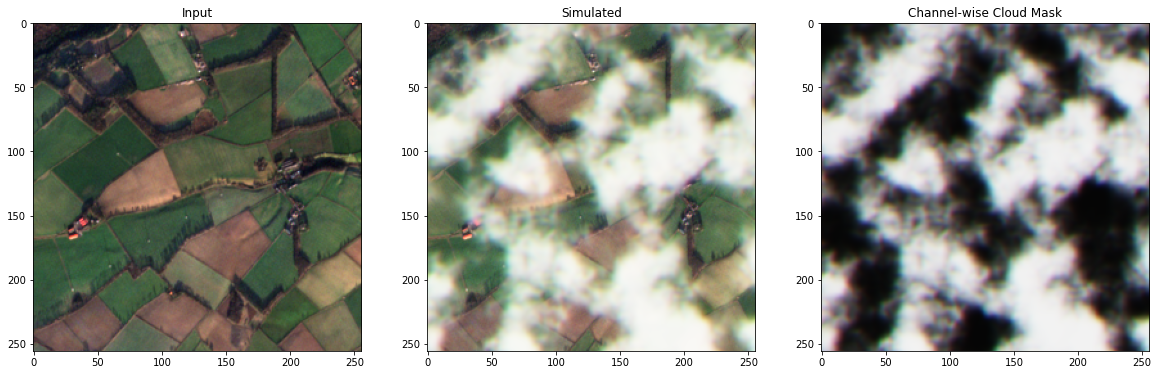

In [7]:
cl, mask = add_cloud(rgb_img,
                     return_cloud=True
                    )

plt.subplot(1,3,1)
plt.imshow(rgb_img)
plt.title('Input')
plt.subplot(1,3,2)
plt.imshow(cl)
plt.title('Simulated')
plt.subplot(1,3,3)
plt.imshow(mask)
plt.title('Channel-wise Cloud Mask')

# Cloud Types: Thick Foggy Cloud

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

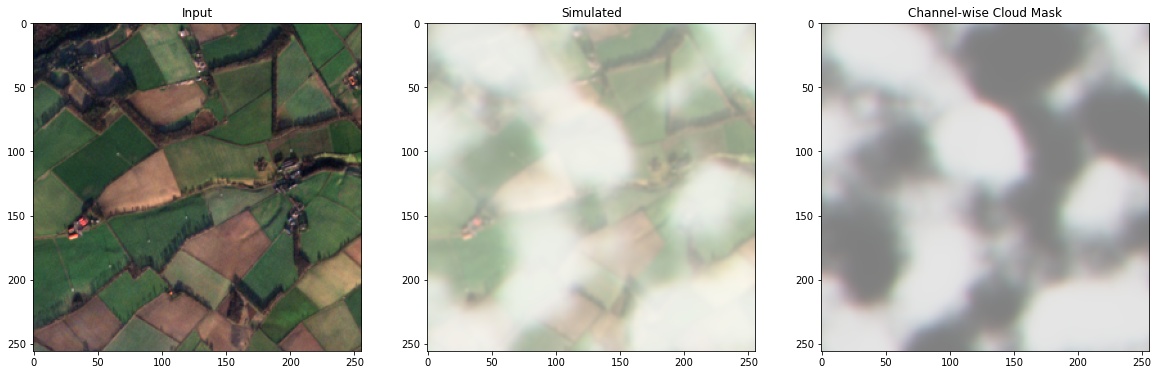

In [8]:
cl, mask = add_cloud(rgb_img,
                     min_lvl=0.1,
                     max_lvl=0.5,
                     decay_factor=1.85,
                     return_cloud=True)

plt.subplot(1,3,1)
plt.imshow(rgb_img)
plt.title('Input')
plt.subplot(1,3,2)
plt.imshow(cl)
plt.title('Simulated')
plt.subplot(1,3,3)
plt.imshow(mask)
plt.title('Channel-wise Cloud Mask')

# Cloud Types: Thin Fog

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

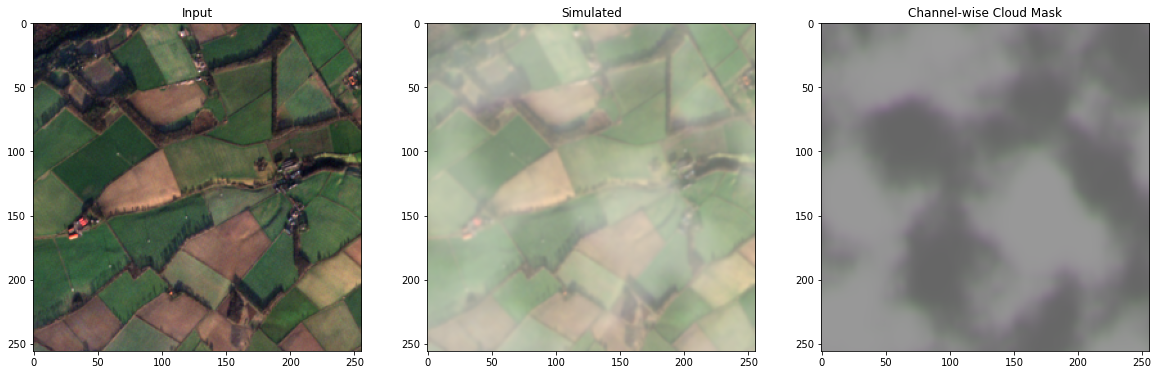

In [9]:
cl, mask = add_cloud(rgb_img,
                     min_lvl=0.4,
                     max_lvl=0.6,
                     decay_factor=1.5,
                     return_cloud=True)

plt.subplot(1,3,1)
plt.imshow(rgb_img)
plt.title('Input')
plt.subplot(1,3,2)
plt.imshow(cl)
plt.title('Simulated')
plt.subplot(1,3,3)
plt.imshow(mask)
plt.title('Channel-wise Cloud Mask')

# Thermal Image Example

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

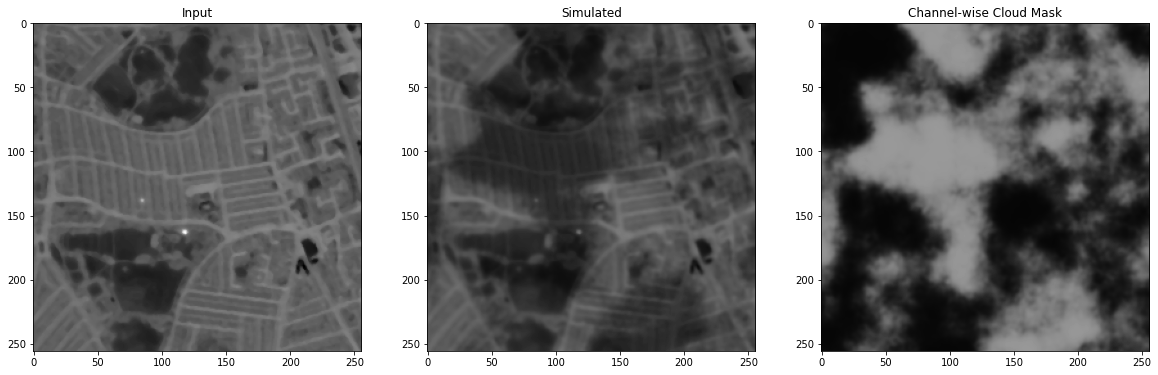

In [10]:
cl, mask = add_cloud(mwir_img,
                     max_lvl = 0.6,                    
                     invert=True,
                     blur_scaling=1.0,
                     return_cloud=True
                    )
plt.subplot(1,3,1)
plt.imshow(mwir_img, cmap='gray')
plt.title('Input')
plt.subplot(1,3,2)
plt.imshow(cl[...,0],vmin=0.0,vmax=1.0, cmap='gray')
plt.title('Simulated')
plt.subplot(1,3,3)
plt.imshow(mask[...,0],vmin=0.0,vmax=1.0, cmap='gray')
plt.title('Channel-wise Cloud Mask')

## Gradual Cloud Increase

An interesting result can be obtained by repeatedly applying the cloud augmentation. Eventually, the image becomes dominated by the cloud component.

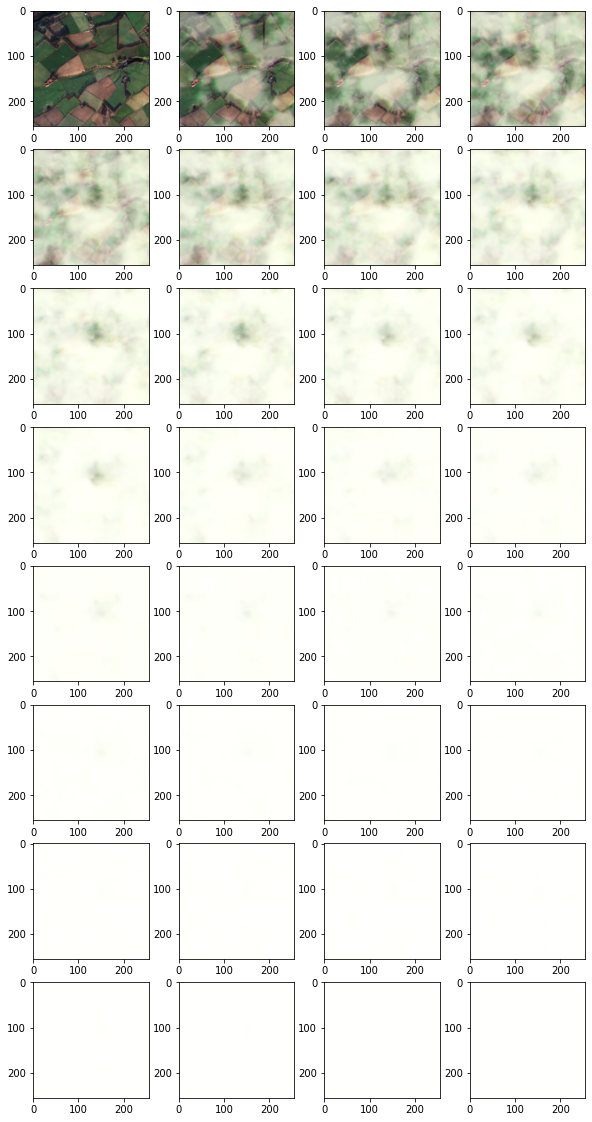

In [11]:
new = rgb_img

plt.figure(figsize=(10,20))
for step in range(32):
    
    plt.subplot(8,4,1+step)
    plt.imshow(new.clip(0,1))
    
    lims = sorted([0.6+0.4*el for el in np.random.rand(2).tolist()])
    
    new = add_cloud(new,
                    min_lvl=0.5,
                    max_lvl=1.0)

# Parameter Ablations
## 1. Basic Cloud

A basic cloud with `max_lvl` of ground component (`1.0` guarantees some clear pixels) and `min_lvl` that controles the maximum value of cloud strength (`1.0` guarantees some pixels with non-transparent cloud).

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

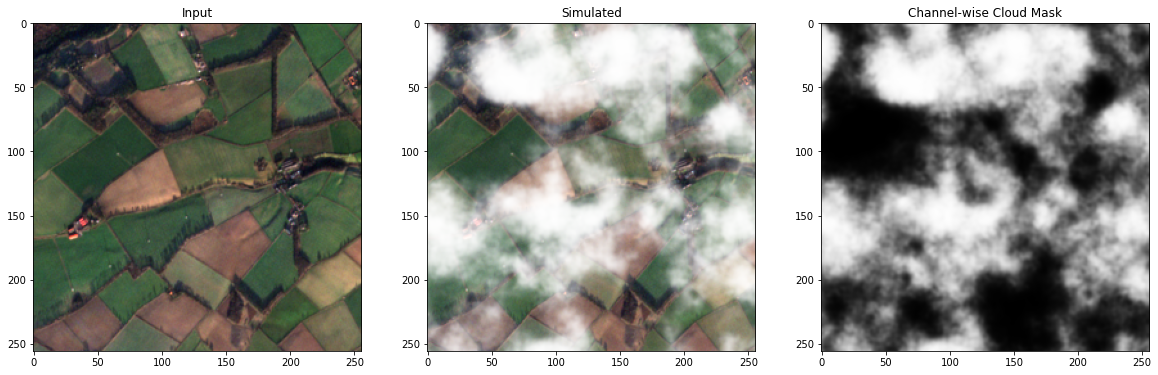

In [13]:
cl, mask = add_cloud(rgb_img,
                     min_lvl=0.0,
                     max_lvl=1.0,
                     cloud_color=False,
                     channel_offset=0,
                     blur_scaling=0,
                     return_cloud=True
                     )

plt.subplot(1,3,1)
plt.imshow(rgb_img)
plt.title('Input')
plt.subplot(1,3,2)
plt.imshow(cl)
plt.title('Simulated')
plt.subplot(1,3,3)
plt.imshow(mask)
plt.title('Channel-wise Cloud Mask')

## 2. Cloud Color

The color of the cloud component (white by default) can be adjusted with the average color from the clear underlying image by setting `cloud_color` to `True`.

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

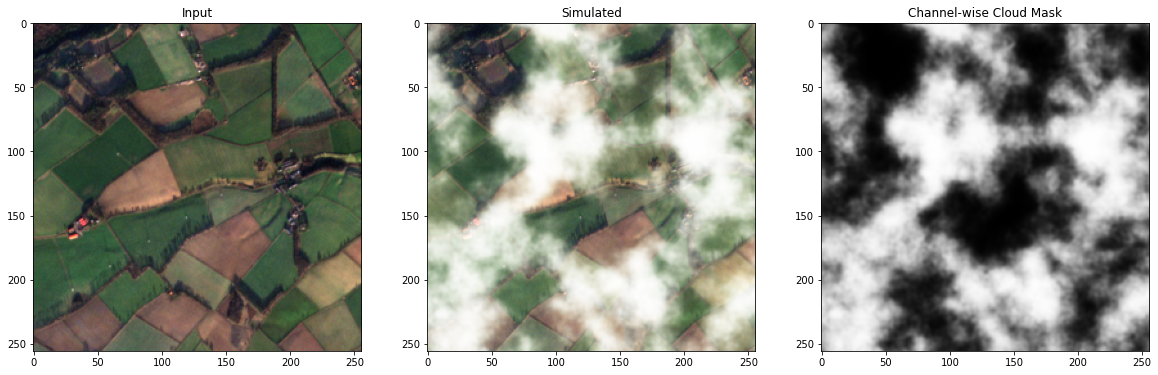

In [14]:
cl, mask = add_cloud(rgb_img,
                     min_lvl=0.0,
                     max_lvl=1.0,
                     cloud_color=True,
                     channel_offset=0,
                     blur_scaling=0.0,
                     return_cloud=True
                    )

plt.subplot(1,3,1)
plt.imshow(rgb_img)
plt.title('Input')
plt.subplot(1,3,2)
plt.imshow(cl)
plt.title('Simulated')
plt.subplot(1,3,3)
plt.imshow(mask)
plt.title('Channel-wise Cloud Mask')

## 3. Channel Offset

The `channel_offset` setting controls the maximum positional offset in `x` or `y` direction between the channel-specific cloud masks and the base cloud mask (The value is sampled uniformly from the range `[-channel_offset,+channel_offset]`).

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

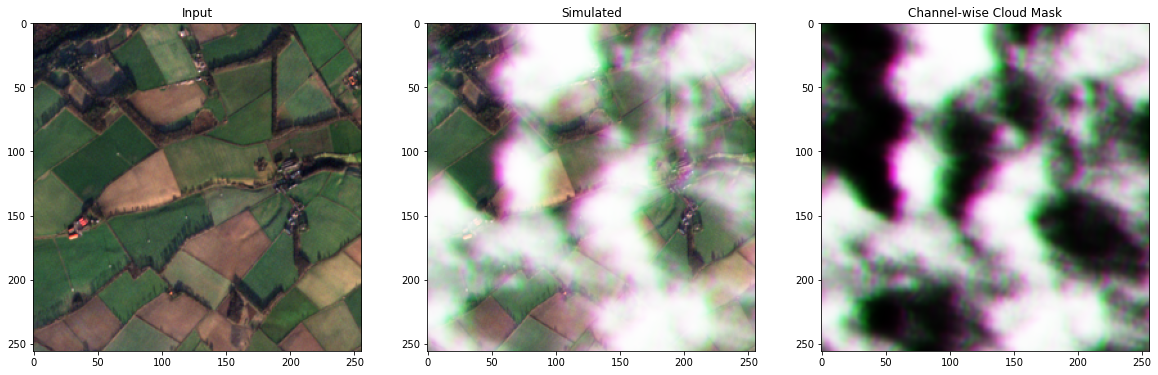

In [15]:
cl, mask = add_cloud(rgb_img,
                     min_lvl=0.0,
                     max_lvl=1.0,
                     cloud_color=False,
                     channel_offset=3,
                     blur_scaling=0.0,
                     return_cloud=True
                    )

plt.subplot(1,3,1)
plt.imshow(rgb_img)
plt.title('Input')
plt.subplot(1,3,2)
plt.imshow(cl)
plt.title('Simulated')
plt.subplot(1,3,3)
plt.imshow(mask)
plt.title('Channel-wise Cloud Mask')

## 4. Blur Under Cloud

By setting blur_scaling argument to a value different than `0.0`, a locally varying Gaussian blur can be applied. The standard deviation is proportional to the cloud strength (ranging between `0` and `1`) multplied by the `blur_scaling`

 factor.

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

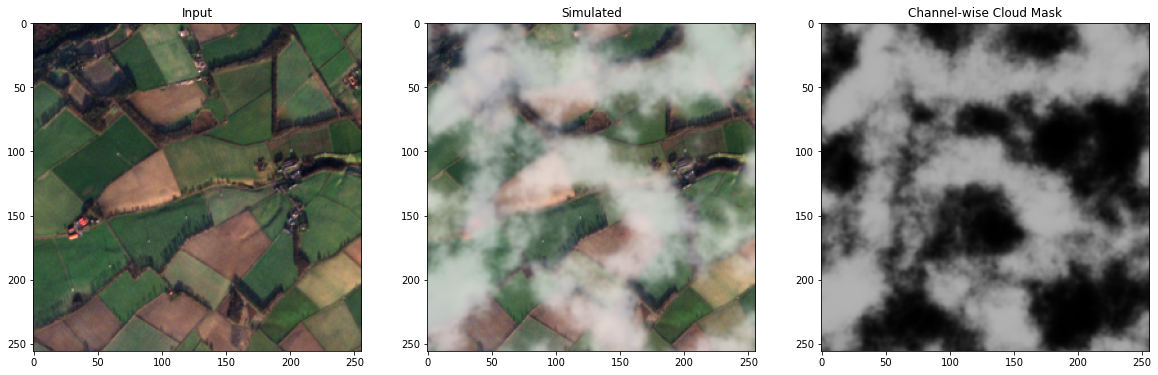

In [16]:
cl, mask = add_cloud(rgb_img,
                     min_lvl=0.3,
                     max_lvl=1.0,
                     cloud_color=False,
                     channel_offset=0,
                     blur_scaling=4.0,
                     return_cloud=True
                    )

plt.subplot(1,3,1)
plt.imshow(rgb_img)
plt.title('Input')
plt.subplot(1,3,2)
plt.imshow(cl)
plt.title('Simulated')
plt.subplot(1,3,3)
plt.imshow(mask)
plt.title('Channel-wise Cloud Mask')

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

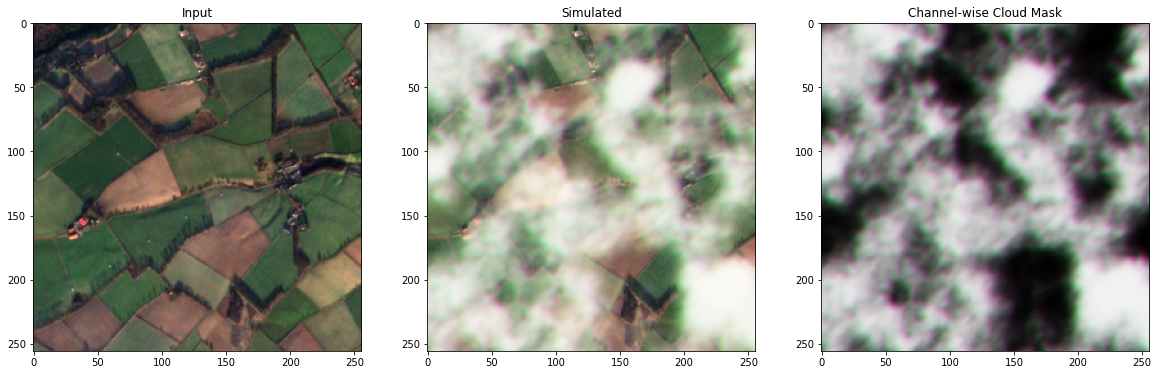

In [24]:
cl, mask = add_cloud(rgb_img,
                     min_lvl=0.05,
                     max_lvl=1.0,
                     return_cloud=True
                     )

plt.subplot(1,3,1)
plt.imshow(rgb_img)
plt.title('Input')
plt.subplot(1,3,2)
plt.imshow(cl)
plt.title('Simulated')
plt.subplot(1,3,3)
plt.imshow(mask)
plt.title('Channel-wise Cloud Mask')